In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
import sklearn.ensemble as ske
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
import random
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv("nbaplayersdraft.csv")
df.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [54]:
df.dtypes

id                             int64
year                           int64
rank                           int64
overall_pick                   int64
team                          object
player                        object
college                       object
years_active                 float64
games                        float64
minutes_played               float64
points                       float64
total_rebounds               float64
assists                      float64
field_goal_percentage        float64
3_point_percentage           float64
free_throw_percentage        float64
average_minutes_played       float64
points_per_game              float64
average_total_rebounds       float64
average_assists              float64
win_shares                   float64
win_shares_per_48_minutes    float64
box_plus_minus               float64
value_over_replacement       float64
dtype: object

## Part 1: Data Comprehension

### Part A.

#### a. Went to Duke and were drafted in or before the 2000 draft

In [55]:
df[
    (df["college"] == "Duke") & 
    (df["year"] <= 2000)].groupby("team")[["player"]].count().sum()

player    17
dtype: int64

#### b. Have a first name that begins with D and were drafted in an even year draft (1990, 1992, 1994, …)?

In [56]:
D_even = df[[x[0] == "D" for x in df["player"]] & (df["year"] % 2 == 0)]
D_even

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
54,55,1990,1,1,NJN,Derrick Coleman,Syracuse,15.0,781.0,25903.0,...,0.295,0.769,33.2,16.5,9.3,2.5,64.3,0.119,1.4,22.3
57,58,1990,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,...,0.397,0.793,28.6,12.9,2.8,2.1,33.4,0.089,0.2,9.9
68,69,1990,15,15,MIA,Dave Jamerson,Ohio University,3.0,90.0,594.0,...,0.277,0.860,6.6,3.4,0.9,0.7,0.2,0.018,-3.9,-0.3
71,72,1990,18,18,SAC,Duane Causwell,Temple,11.0,541.0,9409.0,...,0.286,0.618,17.4,4.9,4.2,0.4,15.8,0.081,-2.3,-0.7
72,73,1990,19,19,BOS,Dee Brown,Jacksonville University,12.0,608.0,16843.0,...,0.357,0.825,27.7,11.1,2.6,3.7,33.4,0.095,0.8,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,1735,2018,53,53,OKC,Devon Hall,Virginia,1.0,11.0,81.0,...,0.235,0.500,7.4,1.8,0.6,1.2,-0.2,-0.116,-6.7,-0.1
1810,1811,2020,9,9,WAS,Deni Avdija,NaN,2.0,136.0,3241.0,...,0.316,0.729,23.8,7.6,5.1,1.7,3.6,0.054,-2.3,-0.2
1812,1813,2020,11,11,SAS,Devin Vassell,Florida State,2.0,133.0,2993.0,...,0.357,0.840,22.5,9.1,3.6,1.4,4.8,0.077,-0.9,0.8
1831,1832,2020,30,30,BOS,Desmond Bane,TCU,2.0,144.0,3785.0,...,0.435,0.882,26.3,14.0,3.8,2.3,10.1,0.129,1.3,3.2


In [57]:
df

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1918,2021,56,56,CHO,Scottie Lewis,Florida,1.0,2.0,7.0,...,NaN,0.500,3.5,0.5,0.0,0.5,0.0,0.164,6.0,0.0
1918,1919,2021,57,57,CHO,Balša Koprivica,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,1920,2021,58,58,NYK,Jericho Sims,Texas,1.0,41.0,555.0,...,NaN,0.414,13.5,2.2,4.1,0.5,1.5,0.128,-1.7,0.0
1920,1921,2021,59,59,BRK,RaiQuan Gray,Florida State,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='overall_pick'>

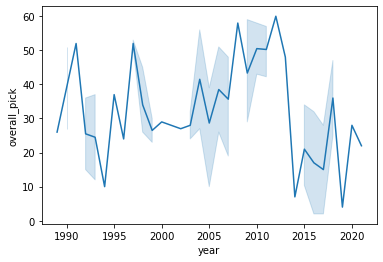

In [58]:
d = df[df["team"] == 'LAL']
sns.lineplot(data=d, x="year", y="overall_pick")

### Part B.

In [59]:
pick_slot_df = df.groupby(["team", "year"])[["overall_pick"]].min()

In [60]:
pick_slot_df

overall_pick
team year              
ATL  1989            23
     1990            10
     1991             9
     1992            10
     1993            15
...                 ...
WSB  1992             6
     1993             6
     1994             5
     1995             4
     1996            55

[904 rows x 1 columns]

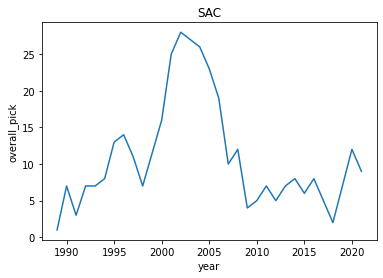

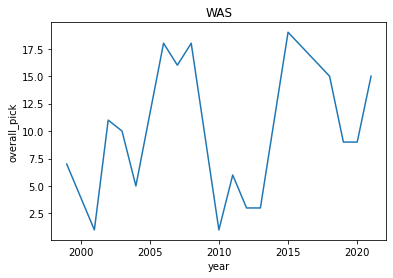

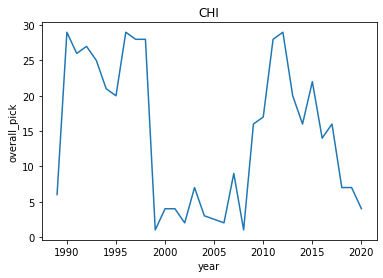

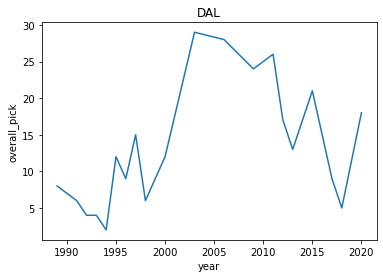

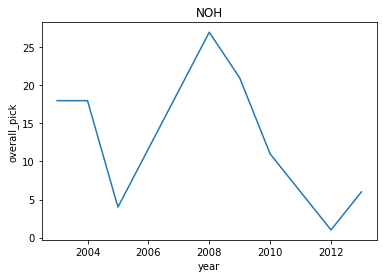

In [100]:
for i in random.sample(list(df['team'].unique()), 5):
    d = pick_slot_df.reset_index()
    d = d[d['overall_pick'] <= 30]
    d = d[d["team"] == i]
    plt.figure()
    sns.lineplot(data=d, x="year", y="overall_pick", err_style=None)
    plt.title(i)

In [62]:
pick_slot_df.groupby("team").diff()

overall_pick
team year              
ATL  1989           NaN
     1990         -13.0
     1991          -1.0
     1992           1.0
     1993           5.0
...                 ...
WSB  1992         -13.0
     1993           0.0
     1994          -1.0
     1995          -1.0
     1996          51.0

[904 rows x 1 columns]

## Part 2: Analytical Acumen

### EDA

In [63]:
df.describe()

,id,year,rank,overall_pick,years_active,games,minutes_played,points,total_rebounds,assists,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
count,1922.000000,1922.000000,1922.000000,1922.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,...,1545.000000,1633.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1668.000000,1668.000000,1669.000000
mean,961.500000,2005.317378,29.694589,29.694589,6.332534,348.042540,8399.055722,3580.413421,1497.009587,774.300779,...,0.272405,0.716825,18.134032,7.275734,3.194368,1.550749,17.873697,0.061691,-2.311271,4.403176
std,554.977927,9.456946,16.912454,16.912454,4.656321,324.897567,9845.871529,4826.142847,2003.686388,1284.602969,...,0.128339,0.118702,8.707656,4.969343,2.083895,1.488536,27.989805,0.094467,4.143403,11.461729
min,1.000000,1989.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.700000,-1.264000,-52.000000,-8.500000
25%,481.250000,1997.000000,15.000000,15.000000,2.000000,72.000000,838.000000,265.000000,128.000000,46.000000,...,0.222000,0.659000,11.000000,3.400000,1.700000,0.500000,0.400000,0.030000,-3.900000,-0.400000
50%,961.500000,2005.000000,30.000000,30.000000,5.000000,235.000000,4204.000000,1552.000000,656.000000,257.000000,...,0.317000,0.736000,17.700000,6.200000,2.800000,1.100000,5.300000,0.069000,-2.000000,0.000000
75%,1441.750000,2013.000000,44.000000,44.000000,10.000000,584.000000,13246.000000,5150.000000,2139.000000,910.000000,...,0.356000,0.797000,24.800000,10.000000,4.200000,2.100000,24.500000,0.104000,-0.300000,4.500000
max,1922.000000,2021.000000,60.000000,60.000000,22.000000,1541.000000,52139.000000,37062.000000,15091.000000,12091.000000,...,1.000000,1.000000,41.100000,27.200000,13.300000,9.500000,249.500000,1.442000,51.100000,142.600000


In [65]:
## Group players in buckets of every 10 picks ##
df["overall_pick_tens"] = (df["overall_pick"] // 10) + 1 

## 
df_filtered  = df[(df["games"] > 55)].dropna()

In [66]:
df_filtered.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,overall_pick_tens
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,1
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,1
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,1
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,1
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,1


In [67]:
# Index on overall pick
tidy_df = df_filtered.drop(columns={"team", "player", "college"}).set_index("overall_pick_tens")

# Stack column names into a column, obtaining a "long" version of the dataset
tidy_df = tidy_df.stack()
# Reset indices into proper columns for plotting purposes
tidy_df = tidy_df.reset_index()
# Rename column names
tidy_df = tidy_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_df

,overall_pick_tens,Attribute,Values
0,1,id,1.00
1,1,year,1989.00
2,1,rank,1.00
3,1,overall_pick,1.00
4,1,years_active,11.00
...,...,...,...
23368,5,average_assists,1.50
23369,5,win_shares,0.40
23370,5,win_shares_per_48_minutes,0.03
23371,5,box_plus_minus,-3.10


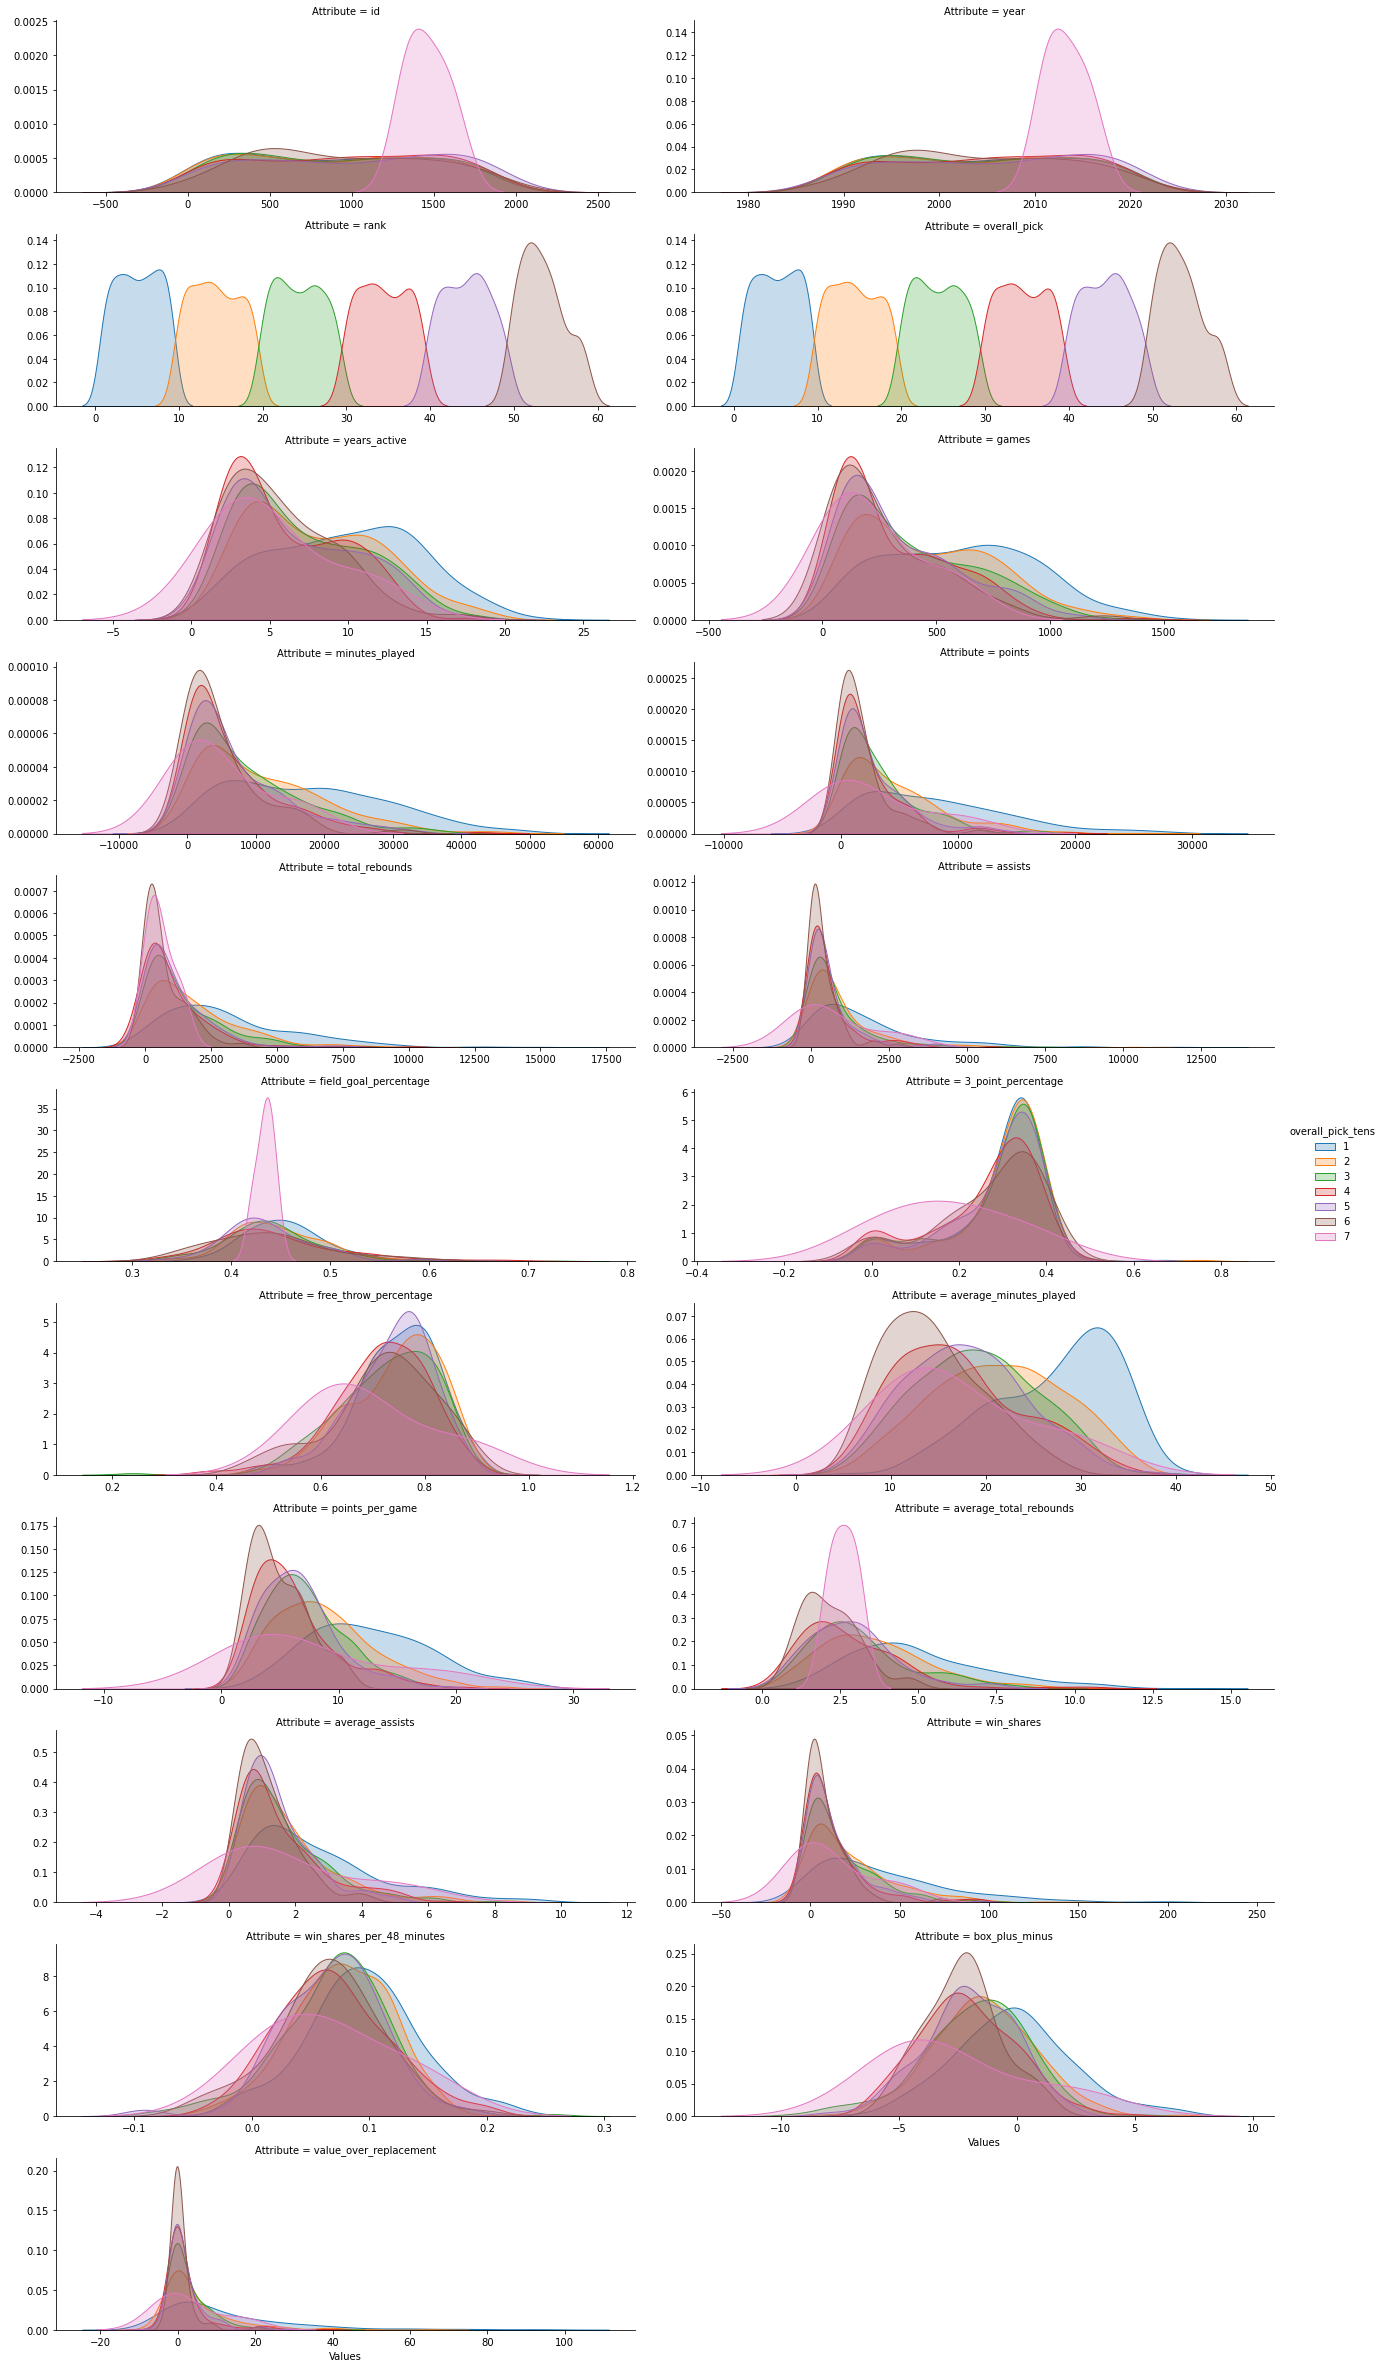

In [68]:
## KDE plots to observe distributions of variables by every 10 draft picks ##
## i.e. picks 1-10 vs 11-20 vs 21-30, etc. ##
facets = sns.FacetGrid(data=tidy_df, col='Attribute', hue="overall_pick_tens", 
                      sharey=False, sharex=False, aspect=3, col_wrap=2)

_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [69]:
# Index on LeagueIndex
tidy_df = df.drop(columns={"team", "player", "college"}).set_index("overall_pick")

# Stack column names into a column, obtaining a "long" version of the dataset
tidy_df = tidy_df.stack()
# Reset indices into proper columns for plotting purposes
tidy_df = tidy_df.reset_index()
# Rename column names
tidy_df = tidy_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_df

,overall_pick,Attribute,Values
0,1,id,1.000
1,1,year,1989.000
2,1,rank,1.000
3,1,years_active,11.000
4,1,games,474.000
...,...,...,...
35890,60,win_shares,-0.100
35891,60,win_shares_per_48_minutes,-0.024
35892,60,box_plus_minus,-7.000
35893,60,value_over_replacement,-0.300


In [70]:
df_filtered_means = df_filtered.groupby("overall_pick").mean()
df_filtered_means["mpg"] = df_filtered_means["minutes_played"]/df_filtered_means["games"]
df_filtered_means.head()

,id,year,rank,years_active,games,minutes_played,points,total_rebounds,assists,field_goal_percentage,...,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,overall_pick_tens,mpg
overall_pick,,,,,,,,,,,,,,,,,,,,,
1,948.461538,2005.538462,1.0,10.346154,612.884615,20324.769231,11147.961538,4658.807692,2067.346154,0.486769,...,32.034615,17.657692,7.030769,3.534615,58.888462,0.121692,1.676923,22.915385,1.0,33.162473
2,854.857143,2003.964286,2.0,10.607143,678.321429,20329.428571,9325.000000,3913.250000,2283.392857,0.457107,...,29.235714,13.721429,5.575000,3.235714,50.389286,0.102429,0.460714,16.832143,1.0,29.970200
3,864.142857,2004.107143,3.0,10.714286,669.678571,20829.071429,10668.392857,3418.571429,2401.964286,0.459214,...,30.396429,15.571429,5.232143,3.264286,53.485714,0.112857,1.075000,19.039286,1.0,31.103088
4,885.517241,2004.448276,4.0,10.758621,683.689655,20932.620690,9729.827586,3932.413793,2243.413793,0.453414,...,29.568966,13.551724,5.444828,2.882759,52.072414,0.100931,0.193103,16.910345,1.0,30.617138
5,858.000000,2003.960000,5.0,11.480000,739.000000,21329.840000,10322.360000,3558.280000,2169.280000,0.452200,...,28.064000,13.504000,4.712000,3.084000,47.616000,0.095200,-0.064000,14.880000,1.0,28.863112


In [71]:
# Index on LeagueIndex
tidy_df = df.drop(columns={"team", "player", "college"}).set_index("overall_pick")

# Stack column names into a column, obtaining a "long" version of the dataset
tidy_df = tidy_df.stack()
# Reset indices into proper columns for plotting purposes
tidy_df = tidy_df.reset_index()
# Rename column names
tidy_df = tidy_df.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
tidy_df

,overall_pick,Attribute,Values
0,1,id,1.000
1,1,year,1989.000
2,1,rank,1.000
3,1,years_active,11.000
4,1,games,474.000
...,...,...,...
35890,60,win_shares,-0.100
35891,60,win_shares_per_48_minutes,-0.024
35892,60,box_plus_minus,-7.000
35893,60,value_over_replacement,-0.300


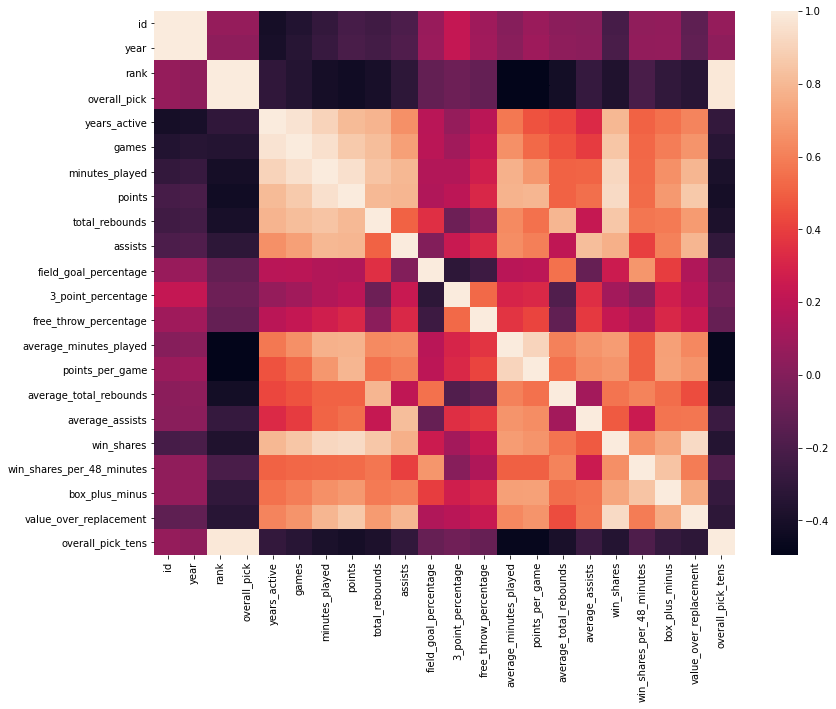

In [72]:
plt.figure(figsize=(13,10))
p = sns.heatmap(df_filtered.corr())
plt.savefig("heatmap.png")

### Scatter Plots

<AxesSubplot:title={'center':'Avg mins vs WS48'}, xlabel='average_minutes_played', ylabel='win_shares_per_48_minutes'>

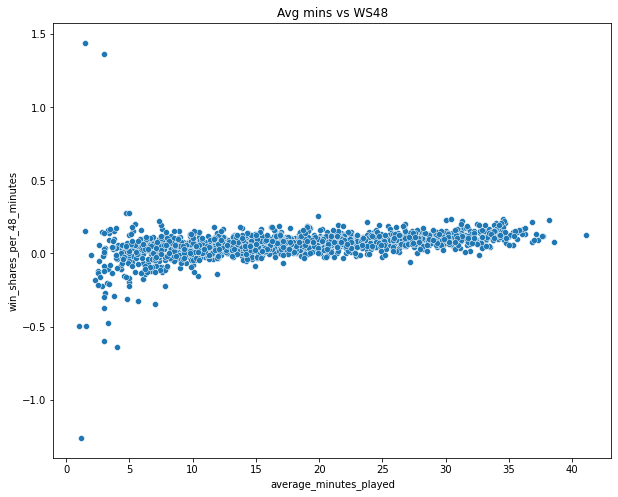

In [73]:
plt.figure(figsize=(10,8))
plt.title("Avg mins vs WS48")
sns.scatterplot(data=df, x="average_minutes_played", y="win_shares_per_48_minutes")

<AxesSubplot:title={'center':'Avg mins vs WS48'}, xlabel='average_minutes_played', ylabel='box_plus_minus'>

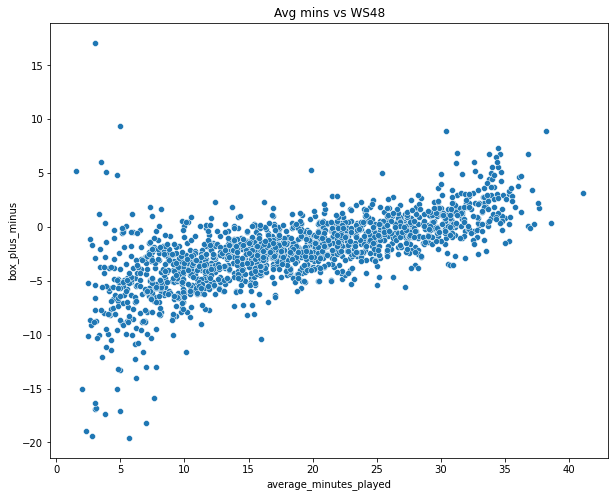

In [74]:
plt.figure(figsize=(10,8))
plt.title("Avg mins vs WS48")
d = df[abs(df['box_plus_minus']) < 20]
sns.scatterplot(data=d, x="average_minutes_played", y="box_plus_minus")

### Line Plots

<AxesSubplot:title={'center':'Pick vs Win Shares'}, xlabel='overall_pick', ylabel='win_shares'>

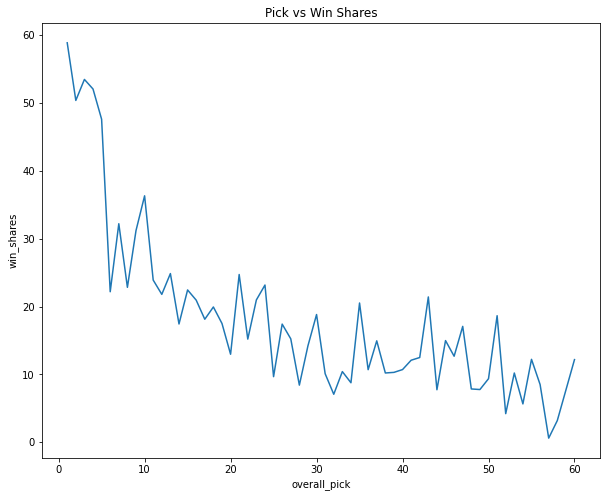

In [75]:
plt.figure(figsize=(10,8))
plt.title('Pick vs Win Shares')
sns.lineplot(data=df_filtered_means, x="overall_pick", y="win_shares")

<AxesSubplot:title={'center':'Pick vs Win Shares_48'}, xlabel='overall_pick', ylabel='win_shares_per_48_minutes'>

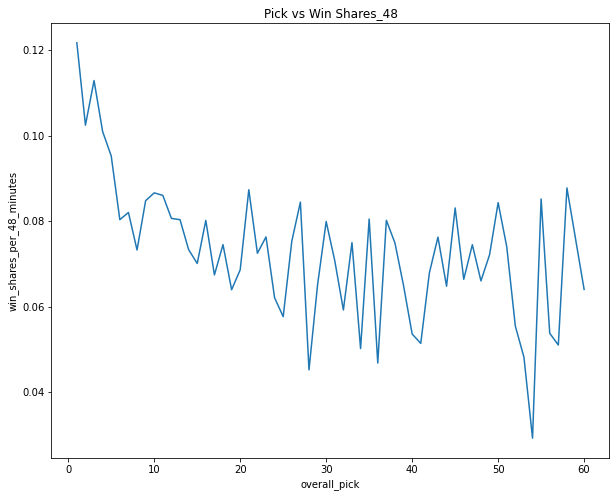

In [76]:
plt.figure(figsize=(10,8))
plt.title('Pick vs Win Shares_48')
sns.lineplot(data=df_filtered_means, x="overall_pick", y="win_shares_per_48_minutes")

<AxesSubplot:title={'center':'Pick vs VORP'}, xlabel='overall_pick', ylabel='value_over_replacement'>

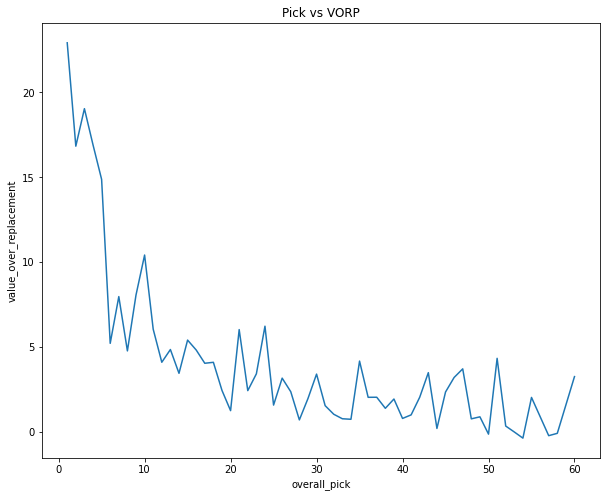

In [77]:
plt.figure(figsize=(10,8))
plt.title('Pick vs VORP')
sns.lineplot(data=df_filtered_means, x="overall_pick", y="value_over_replacement")

From the findings above, I settle with using VORP to measure draft success.

## VORP

In [78]:
df.columns

Index(['id', 'year', 'rank', 'overall_pick', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists', 'win_shares',
       'win_shares_per_48_minutes', 'box_plus_minus', 'value_over_replacement',
       'overall_pick_tens'],
      dtype='object')

<AxesSubplot:xlabel='overall_pick', ylabel='value_over_replacement'>

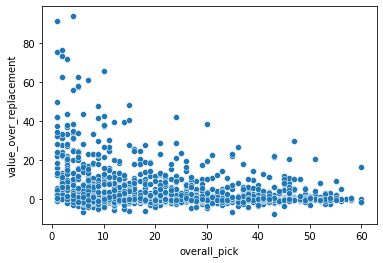

In [79]:
sns.scatterplot(data=df_filtered, x="overall_pick", y="value_over_replacement")

In [80]:
def model_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_sqerr = mean_squared_error(model.predict(X_train), y_train)
    test_sqerr = mean_squared_error(model.predict(X_test), y_test)
    mean_test_err = mean_absolute_error(model.predict(X_test), y_test)
    
    ## The lines below can be commented out to print values, currently commented to 
    ## reduce model output 
    
#     print("score for the training set: ", train_score)
#     print("score for the test set: ", test_score)
#     print("mean squared error for the training set: ", train_sqerr)
#     print("mean squared error for the test set: ", test_sqerr)
#     print("mean abs error for test set: ", mean_test_err)

    return {"train_score": train_score, 
            "test_score": test_score, 
            "train_sqerr":train_sqerr, 
            "test_sqerr":test_sqerr, 
            "mean_test_err":mean_test_err}

In [128]:
## Training model on mean VORP at each draft slot ##

m = LinearRegression()

X = np.array(df_filtered_means.reset_index()["overall_pick"])
y = df_filtered_means["value_over_replacement"]

poly = PolynomialFeatures(degree=2, include_bias=True)
poly_features = poly.fit_transform(X.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

m.fit(X_train, y_train)

y_pred = m.predict(X_test)
print(model_performance(m, X_train, y_train, X_test, y_test))

vorp_pred = m.predict(poly_features)
coeffs = m.coef_

{'train_score': 0.7403674184620643, 'test_score': 0.6770786612879985, 'train_sqerr': 4.409634794960615, 'test_sqerr': 15.307813190530064, 'mean_test_err': 3.2174297515763848}


In [129]:
full_x = np.array(df_filtered.reset_index()["overall_pick"]).reshape(-1, 1)
full_x_fts = poly.fit_transform(full_x)

df_filtered['pred_VORP'] = m.predict(full_x_fts)

In [147]:
## NBA Teams ##
over = (df_filtered['value_over_replacement'] - df_filtered["pred_VORP"]) > 2.5
under = (df_filtered['value_over_replacement'] - df_filtered["pred_VORP"]) < -2.5
count = 1
df_filtered['VORP_diff'] = df_filtered['pred_VORP'] - df_filtered['value_over_replacement']
df_filtered["over"] = over
df_filtered["under"] = under
df_filtered['count'] = count

vorp_pred_grouped = df_filtered.groupby(["team"]).sum().iloc[:,-5:]

vorp_pred_grouped['over%'] = vorp_pred_grouped['over'] / vorp_pred_grouped['count']
vorp_pred_grouped['under%'] = vorp_pred_grouped['under'] / vorp_pred_grouped['count']
vorp_pred_grouped.sort_values(['under%'], ascending=False).head(10)

,pred_VORP,over,under,count,VORP_diff,over%,under%
team,,,,,,,
NOK,14.975339,0,2,2,15.575339,0.000000,1.000000
NOP,45.088318,0,5,8,36.688318,0.000000,0.625000
CHO,41.159339,0,5,8,30.959339,0.000000,0.625000
ATL,231.602210,4,27,46,112.902210,0.086957,0.586957
CHI,247.784901,11,27,50,42.384901,0.220000,0.540000
LAC,208.619871,5,17,32,83.319871,0.156250,0.531250
MEM,127.596499,7,12,23,-45.103501,0.304348,0.521739
MIA,148.264053,9,14,27,-18.135947,0.333333,0.518519
NYK,125.930540,4,14,28,42.430540,0.142857,0.500000


### College Teams - Underperforming

In [158]:
college_vorp = df_filtered.groupby(["college"]).sum().iloc[:,-5:]

college_vorp['over%'] = college_vorp['over'] / college_vorp['count']
college_vorp['under%'] = college_vorp['under'] / college_vorp['count']

c = college_vorp
c[c['count'] >= 10].sort_values(['under%'], ascending=False).head(10)

,pred_VORP,over,under,count,VORP_diff,over%,under%
college,,,,,,,
Syracuse,113.208687,4,11,18,33.508687,0.222222,0.611111
Florida State,93.417771,3,10,17,32.917771,0.176471,0.588235
Oklahoma State,61.478421,1,7,12,54.478421,0.083333,0.583333
Stanford,78.000927,3,9,16,35.900927,0.187500,0.562500
Gonzaga,69.594193,3,6,11,43.394193,0.272727,0.545455
UNLV,89.668567,3,6,11,-5.231433,0.272727,0.545455
Kansas,185.481725,5,17,32,53.781725,0.156250,0.531250
Duke,366.335207,12,26,49,68.835207,0.244898,0.530612
Louisville,98.000513,3,9,17,60.400513,0.176471,0.529412


### College Teams - Overperforming

In [159]:
c[c['count'] >= 10].sort_values(['over%'], ascending=False).head(10)

,pred_VORP,over,under,count,VORP_diff,over%,under%
college,,,,,,,
Wake Forest,64.783835,6,1,10,-176.816165,0.600000,0.100000
Florida,90.050711,8,6,15,-58.949289,0.533333,0.400000
Georgetown,98.381666,5,4,13,-47.718334,0.384615,0.307692
Georgia Tech,127.358119,7,8,19,-23.941881,0.368421,0.421053
UConn,145.530075,8,8,22,-82.269925,0.363636,0.363636
Arkansas,46.562362,4,3,11,-13.837638,0.363636,0.272727
Marquette,28.454790,4,1,11,-86.445210,0.363636,0.090909
Alabama,59.435759,4,5,12,-28.664241,0.333333,0.416667
UCLA,140.238275,9,10,31,-103.861725,0.290323,0.322581


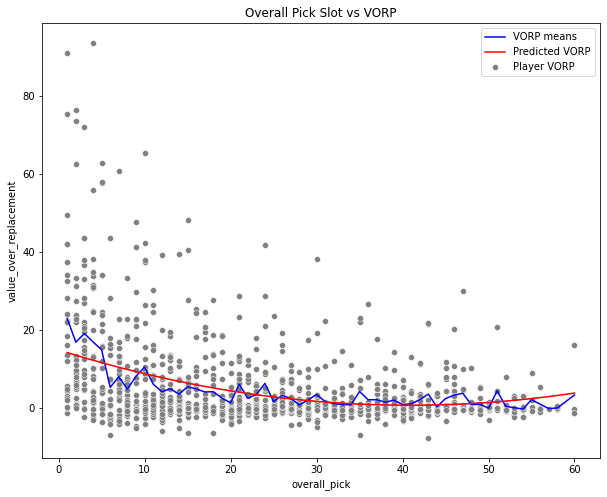

In [135]:
ax = plt.figure(figsize=(10,8))
plt.plot(X, y, color='blue', label="VORP means")
sns.scatterplot(df_filtered['overall_pick'], df_filtered['value_over_replacement'], color='grey', label='Player VORP')
sns.lineplot(df_filtered['overall_pick'], df_filtered['pred_VORP'], color='red', label='Predicted VORP')
plt.title('Overall Pick Slot vs VORP')
plt.legend()